# Explore here

In [278]:
# Import
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.cluster import KMeans

# Metrics
from sklearn.metrics import silhouette_score

# Utils
import warnings
warnings.filterwarnings("ignore")

In [247]:
# Get data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# Configure pandas to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Initial Data Display
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Meaning of the dataset features:

- `MedInc`: Median household income within a block of houses (measured in tens of thousands of dollars)
- `HouseAge`: Median age of a house within a block; a lower number indicates a newer building
- `AveRooms`: Average number of rooms within a block
- `AveBedrms`: Average number of bedrooms within a block
- `Population`: Total number of people residing within a block
- `AveOccup`: Average number of people per household residing within a block (Population / Households)
- `Latitude`: A measure of how far north a house is located; a higher value indicates a higher value
- `Longitude`: A measure of how far west a house is located; A higher value is the further west it is.
- `MedHouseVal`: Median house value for households within a block (measured in hundreds of thousands of dollars)

In [ ]:
# For this classification analysis, only the location of the houses and the average income will be taken into account.
df = df.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], axis=1)
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [249]:
# DataFrame Dimensions
df.shape

(20640, 3)

In [250]:
# Basic Information on Data Types and Non-Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [251]:
# Search and Removal of Duplicate Data
duplicates = df.duplicated().sum()
duplicates

np.int64(5)

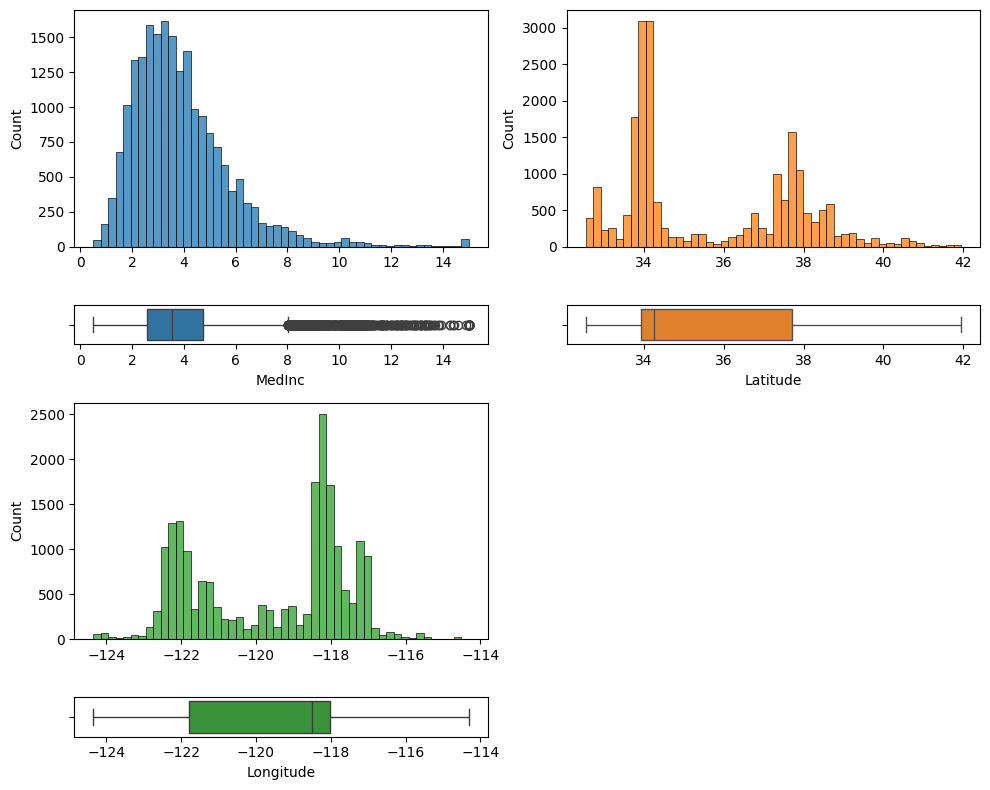

In [252]:
# Analysis of Numerical Variables
fig, axis = plt.subplots(4, 2, figsize = (10, 8), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Create a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "MedInc", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "MedInc", color="#1f77b4").set(xlabel = "MedInc")

sns.histplot(ax = axis[0, 1], data = df, x = "Latitude", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Latitude", color="#ff7f0e").set(xlabel = "Latitude")

sns.histplot(ax = axis[2, 0], data = df, x = "Longitude", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "Longitude", color="#2ca02c").set(xlabel = "Longitude")

# Delete axis
axis[2, 1].axis("off")
axis[3, 1].axis("off")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [ ]:
# Cleaning outliers

# The distribution of "MedInc" shows outliers
# Since these are average incomes, the data may not be incorrect.

# Interquartile range
med_inc_info = df["MedInc"].describe()
var1_iqr = med_inc_info["75%"] - med_inc_info["25%"]
up_limit = med_inc_info["75%"] + 1.5 * var1_iqr
low_limit = med_inc_info["25%"] - 1.5 * var1_iqr

print(up_limit)

df[df["MedInc"] > 8].shape

# Although the data is not incorrect, in our first analysis we will only take the data less than or equal to 8.
df = df[df["MedInc"] <= 8]
df.shape

# With this elimination, we removed more than 96% of the data, so it shouldn't significantly affect our sample.
# If necessary, we'll use a less restrictive threshold to treat these outliers.

8.013024999999999


(19950, 3)

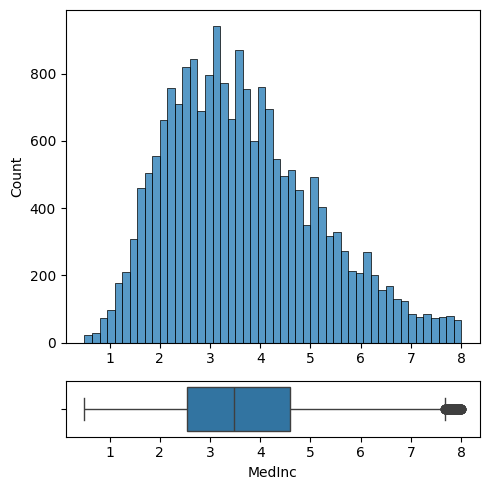

In [254]:
fig, axis = plt.subplots(2, figsize = (5, 5), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax = axis[0], data = df, x = "MedInc", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "MedInc", color="#1f77b4").set(xlabel = "MedInc")
# Adjust the Layout
plt.tight_layout()
# Display the Plot
plt.show()

In [255]:
# Splitting data into train and test sets
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42) # stratify=y for imbalanced classes in the target

In [256]:
# Scaling
# Instantiate the scaler
scaler = StandardScaler().fit(X_train) # or MinMaxScaler
# Transformation and conversion to dataframe of scaled data
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [257]:
# Training
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train_scaled)

KMeans(n_clusters=6, random_state=42)

In [258]:
# Predict in train
clusters_train = model.predict(X_train_scaled)
X_train_scaled['cluster'] = clusters_train

# Predict in test
clusters_test = model.predict(X_test_scaled)
X_test_scaled['cluster'] = clusters_test

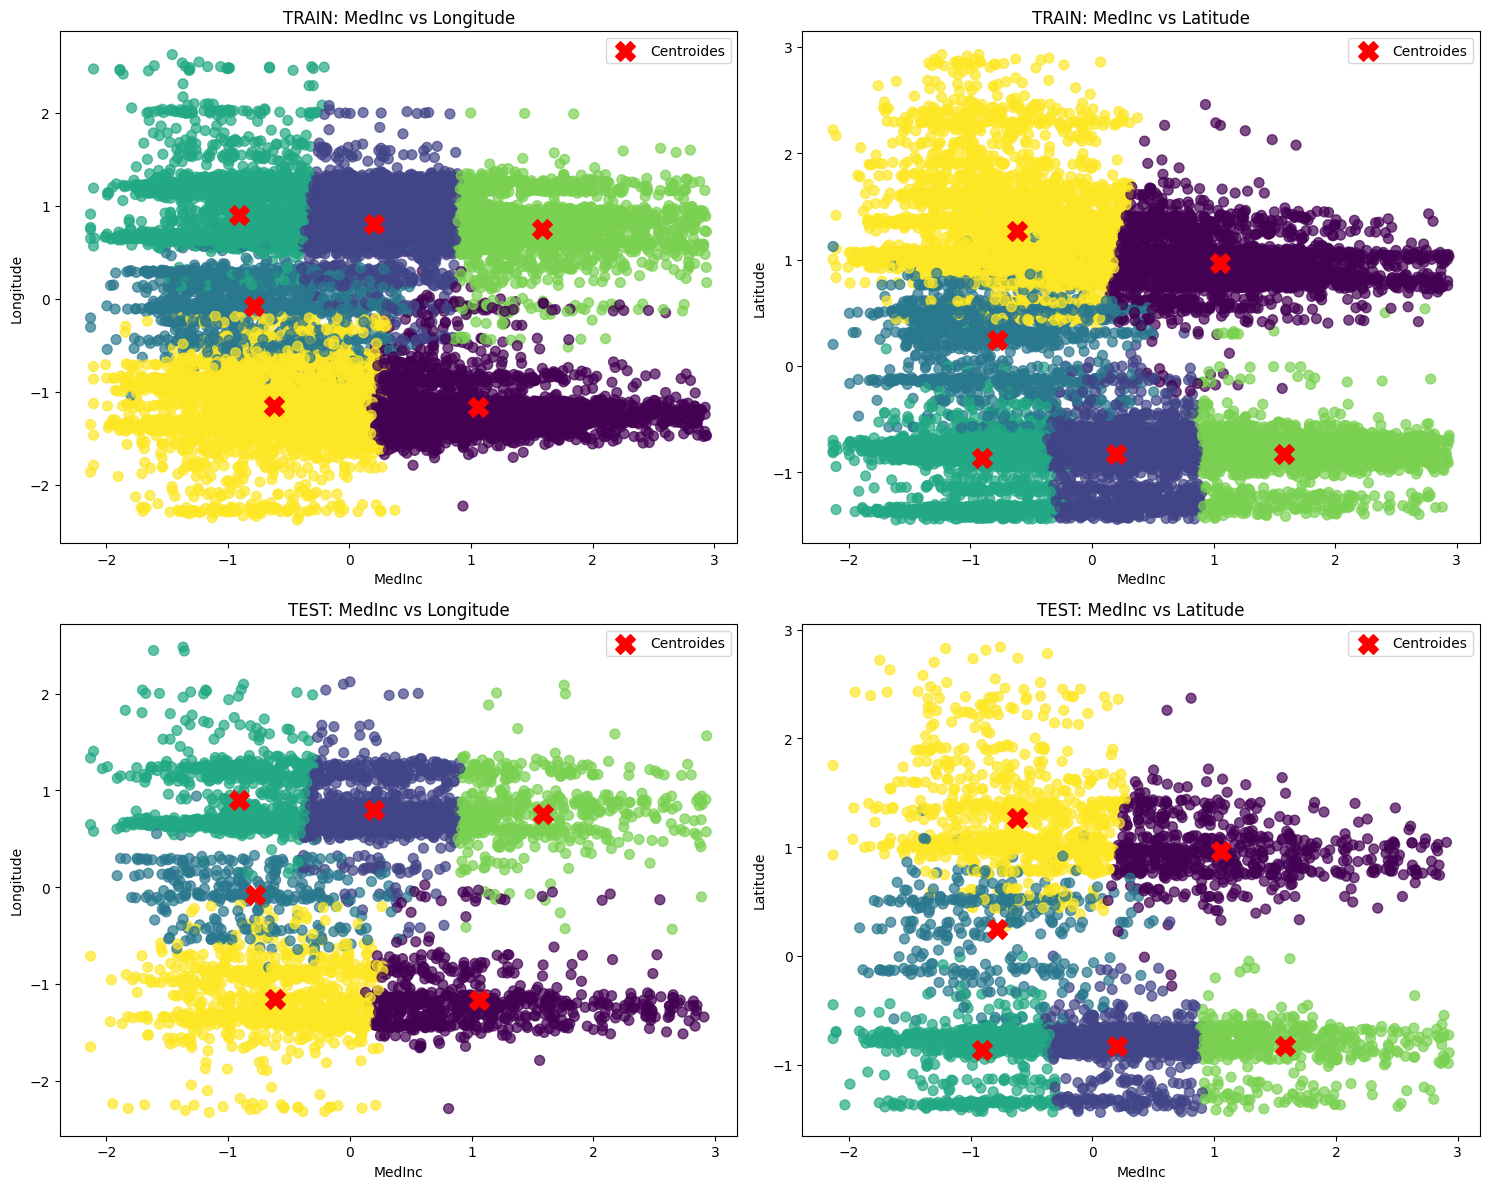

In [ ]:
# Get cluster centers
centroids = model.cluster_centers_

fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 filas, 2 columnas

# TRAIN graphics
# Train: Feature 0 vs Feature 2
scatter1 = axes[0, 0].scatter(
    X_train_scaled.iloc[:, 0],
    X_train_scaled.iloc[:, 2],
    c=clusters_train,
    s=50,
    cmap='viridis',
    alpha=0.7
)
axes[0, 0].scatter(
    centroids[:, 0],
    centroids[:, 2],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)
axes[0, 0].set_title(f"TRAIN: {X_train_scaled.columns[0]} vs {X_train_scaled.columns[2]}")
axes[0, 0].set_xlabel(X_train_scaled.columns[0])
axes[0, 0].set_ylabel(X_train_scaled.columns[2])
axes[0, 0].legend()

# Train: Feature 0 vs Feature 1
scatter2 = axes[0, 1].scatter(
    X_train_scaled.iloc[:, 0],
    X_train_scaled.iloc[:, 1],
    c=clusters_train,
    s=50,
    cmap='viridis',
    alpha=0.7
)
axes[0, 1].scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)
axes[0, 1].set_title(f"TRAIN: {X_train_scaled.columns[0]} vs {X_train_scaled.columns[1]}")
axes[0, 1].set_xlabel(X_train_scaled.columns[0])
axes[0, 1].set_ylabel(X_train_scaled.columns[1])
axes[0, 1].legend()

# TEST Graphics
# Test: Feature 0 vs Feature 2
scatter3 = axes[1, 0].scatter(
    X_test_scaled.iloc[:, 0],
    X_test_scaled.iloc[:, 2],
    c=clusters_test,
    s=50,
    cmap='viridis',
    alpha=0.7
)
axes[1, 0].scatter(
    centroids[:, 0],
    centroids[:, 2],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)
axes[1, 0].set_title(f"TEST: {X_test_scaled.columns[0]} vs {X_test_scaled.columns[2]}")
axes[1, 0].set_xlabel(X_test_scaled.columns[0])
axes[1, 0].set_ylabel(X_test_scaled.columns[2])
axes[1, 0].legend()

# Test: Feature 0 vs Feature 1
scatter4 = axes[1, 1].scatter(
    X_test_scaled.iloc[:, 0],
    X_test_scaled.iloc[:, 1],
    c=clusters_test,
    s=50,
    cmap='viridis',
    alpha=0.7
)
axes[1, 1].scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)
axes[1, 1].set_title(f"TEST: {X_test_scaled.columns[0]} vs {X_test_scaled.columns[1]}")
axes[1, 1].set_xlabel(X_test_scaled.columns[0])
axes[1, 1].set_ylabel(X_test_scaled.columns[1])
axes[1, 1].legend()

# Adjust the Layout
plt.tight_layout()
# Display the Plot
plt.show()

In [ ]:
import plotly.express as px

# 3D graphic for train
fig_train = px.scatter_3d(
    X_train_scaled,
    x=X_train_scaled.columns[0],
    y=X_train_scaled.columns[1],
    z=X_train_scaled.columns[2],
    color='cluster',
    title="TRAIN: Clusters"
)
fig_train.write_html("../figures/clustering_3d_TRAIN.html")

# 3D graphic for test
fig_test = px.scatter_3d(
    X_test_scaled,
    x=X_test_scaled.columns[0],
    y=X_test_scaled.columns[1],
    z=X_test_scaled.columns[2],
    color='cluster',
    title="TEST: Clusters"
)
fig_test.write_html("../figures/clustering_3d_TEST.html")

# TO SEE THE FIGURES IN 3D, IT IS RECOMMENDED TO DOWNLOAD THE HTML FOR THE ROUTE ../figures/ AND OPEN THEM IN THE BROWSER
# THEY REPRESENT THE DIVISION MADE BY THE ALGORITHM OF THE 6 CLUSTERS REQUESTED IN TRAIN AND TEST

k = 2, Inertia = 56838.796642557, Silhouette Index = 0.4063246142772082
k = 3, Inertia = 30563.80305092473, Silhouette Index = 0.5280861425054534
k = 4, Inertia = 19177.460998624076, Silhouette Index = 0.554852361217928
k = 5, Inertia = 10048.25633693559, Silhouette Index = 0.6419846740749416
k = 6, Inertia = 7194.894405545468, Silhouette Index = 0.6698164174385133
k = 7, Inertia = 6816.741934340734, Silhouette Index = 0.6377177007147463
k = 8, Inertia = 5683.927457379523, Silhouette Index = 0.551152310794678
k = 9, Inertia = 5370.98791748271, Silhouette Index = 0.4824512043042281
k = 10, Inertia = 5085.5081633700265, Silhouette Index = 0.49368451658759627


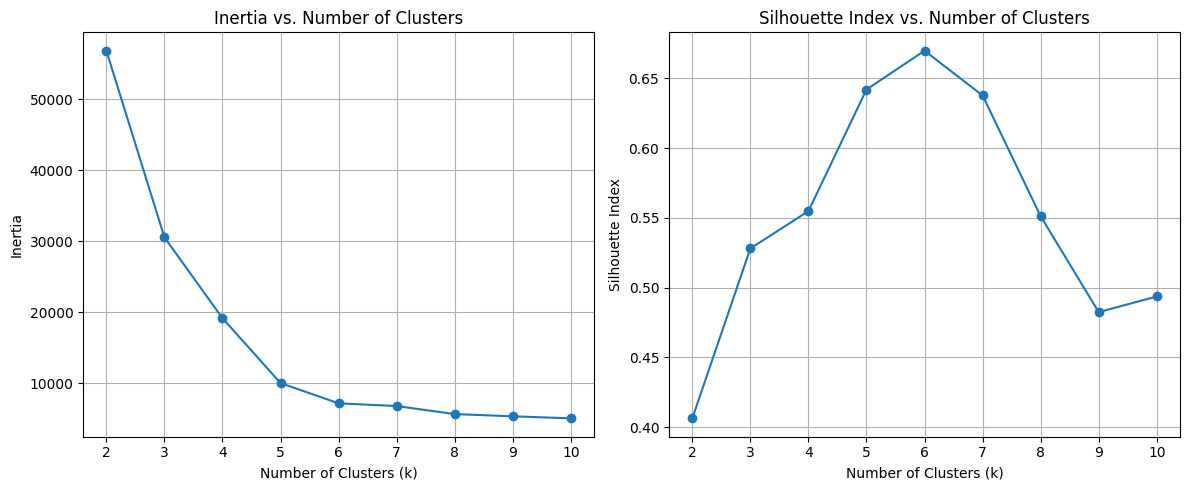

In [275]:
# Define the range of values ​​for k
k_values = range(2, 11)
inertias = []
silhouette_scores = []

# Calculate the inertia and silhouette index for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))

# Print the inertias and silhouette indices for each k
for k, inertia, silhouette in zip(k_values, inertias, silhouette_scores):
    print(f'k = {k}, Inertia = {inertia}, Silhouette Index = {silhouette}')

# Plot inertia as a function of k
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)

# Plot the silhouette index as a function of k
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Index')
plt.title('Silhouette Index vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)

# Adjust the Layout
plt.tight_layout()
# Display the Plot
plt.show()

The project required dividing the data into six groups, and this was done. After analyzing variations in the number of divisions to be performed and the possible inertia and silhouette index results for each, it was determined that six was the most appropriate number of groups to divide the data into. Therefore, the analysis performed and the results obtained were satisfactory.

In [ ]:
# Algorithm for classifying new data
def predict_cluster(features):
    features = [features[0], features[6], features[7]]
    features_scaled = scaler.transform([features])
    pred = model.predict(features_scaled)[0]
    return pred

In [279]:
res = predict_cluster([3.8462, 52.0, 6.281853, 1.081081, 565.0, 2.181467, 37.85, -122.25, 3.422])
print(f"Classification cluster: {res}")

Classification cluster: 5


In [ ]:
# Supervised classification algorithm
X_train_scaled